In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Progress AUC

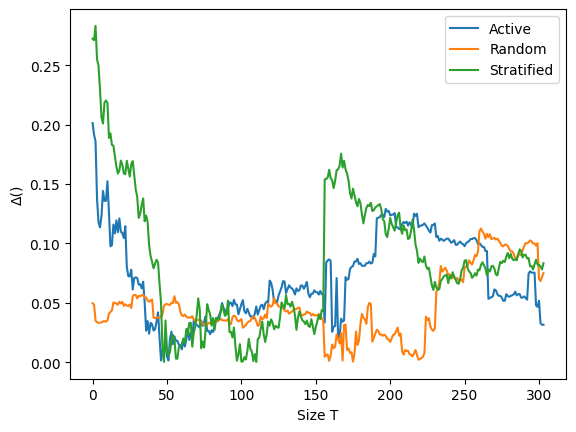

In [10]:
def visualization(PATH):
    df_p = pd.read_csv(f'output/{PATH}.csv')
    df_p['delta_random'] = pd.to_numeric(df_p['delta_random'], errors='coerce')
    df_p['delta_stratified'] = pd.to_numeric(df_p['delta_stratified'], errors='coerce')
    df_p['delta_auc'] = pd.to_numeric(df_p['delta_auc'], errors='coerce')

    fig = plt.figure()

    plt.plot(df_p.index, df_p['delta_auc'], label = 'Active')
    plt.plot(df_p.index, df_p['delta_random'], label = 'Random')
    plt.plot(df_p.index, df_p['delta_stratified'], label = 'Stratified')

    plt.ylabel('Δ()')
    plt.xlabel('Size T')
    plt.legend()
    plt.show()

visualization('run_5')

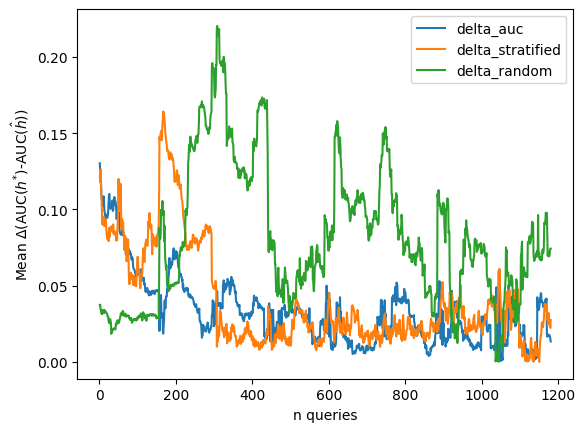

In [3]:
data = pd.read_csv(f'output/run_1.csv')
data['T_size'] = data.index+1
for PATH in os.listdir('output'):
    if 'PATH' != 'run_1.csv':
        df = pd.read_csv(f'output/{PATH}')
        df['T_size'] = df.index+1
    data = pd.concat([df,data])

sorted_data = data.groupby('T_size').agg({'delta_auc': 'mean', 'delta_stratified': 'mean', 'delta_random': 'mean'})

plt.plot(sorted_data, label = sorted_data.columns.values)

plt.ylabel('Mean Δ(AUC($h^{*}$)-AUC($\hat{h}$))')
plt.xlabel('n queries')
plt.legend()
plt.show()

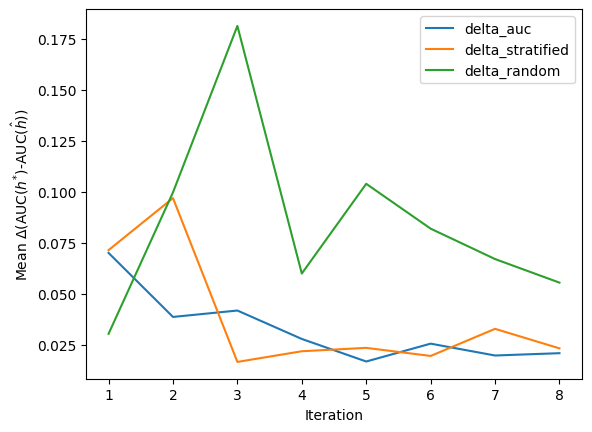

In [27]:
data_1 = pd.read_csv(f'output/run_1.csv')
data_1 = data_1.groupby('Iteration').tail(1)

for PATH in os.listdir('output'):
    if 'PATH' != 'run_1.csv':
        df = pd.read_csv(f'output/{PATH}')
        df = df.groupby('Iteration').tail(1)
    data_1 = pd.concat([df,data_1])

sorted_data = data.groupby('Iteration').agg({'delta_auc': 'mean', 'delta_stratified': 'mean', 'delta_random': 'mean'})

plt.plot(sorted_data, label = sorted_data.columns.values)

plt.ylabel('Mean Δ(AUC($h^{*}$)-AUC($\hat{h}$))')
plt.xlabel('Iteration')
plt.legend()
plt.show()